### Goals
- compute Cross task overlap of molecules
- Get protein sequence distance matrix, colored by a) species b) assay type c) paper reference

In [2]:
import pandas as pd

m2or_chemprop = pd.read_csv('../dgl-lifesci/examples/property_prediction/csv_data_configuration/M2OR_OR_odorant_pairwise_no_mixtures_chemprop.csv')


m2or_chemprop 

,smiles,Q8NGN2: MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLLIYSITVAGNLLILLTVGSDSHLSLPMYHFLGHLSFLDACLSTVTVPKVMAGLLTLDGKVISFEGCAVQLYCFHFLASTECFLYTVMAYDRYLAICQPLHYPVAMNRRMCAEMAGITWAIGATHAAIHTSLTFRLLYCGPCHIAYFFCDIPPVLKLACTDTTINELVMLASIGIVAAGCLILIVISYIFIVAAVLRIRTAQGRQRAFSPCTAQLTGVLLYYVPPVCIYLQPRSSEAGAGAPAVFYTIVTPMLNPFIYTLRNKEVKHALQRLLCSSFRESTAGSPPP,A0A140T8K4: MTEDNYSLTTEFILIGFSDHPDLKILLFLVLSTIYLVTMVGNLGLVALIYMEPRLHTPMYIFLGNLALMDSCCSCAITPKMLENFFSVNRRISLYECMAQFYFLCLAETADCFLLAAMAYDRYVAICNPLQYHTMMSKKLCLQMTTGAYIAGNLHSMIHIGFLFRLIFCRSHVIKHFFCDVLPLYRLSCVDPYINELMILIFSGSVQTFSIIIVLISYFCILFTIFTMKSREGRSKALSTCASHFLSVSIFYGSLLYTYIRPSSINEGNEDIPVAIFYTLVIPLLNPFIYSLRNKEVINAIKRTMNKG,Q8VFV4: MPGGRNSTVITKFILVGFSDFPKLKLVLFVIFLGSYLSTVVWNLGLIILIRIDPYLHTPMYFFLSNLSFLDFCYISSTTPKMLSGFFQKSKSISFVGCTMQYFIFSSLGLSECCLLAAMAYDRYAAICNPLLYTAIMSPSLCVHMVVGAYSTGLLGSLIQLCAILQLHFCGPNIINHFFCDLPQLLVLSCSETFPLQVLKFVIAVIFGVASVIVILISYGYIIGTILNISSVEGRSKAFNTCASHLTAVTLFFGSGLFVYMRPSSNSSQGYDKMASVFYTVVIPMLNPLIYSLRNKEIKDALQRCKNKCFSQCHC,Q8NGT9: MGENQTMVTEFLLLGFLLGPRIQMLLFGLFSLFYIFTLLGNGAILGLISLDSRLHTPMYFFLSHLAVVDIAYTRNTVPQMLANLLHPAKPISFAGCMTQTFLCLSFGHSECLLLVLMSYDRYVAICHPLRYSVIMTWRVCITLAVTSWTCGSLLALAHVVLILRLPFSGPHEINHFFCEILSVLRLACADTWLNQVVIFAACVFFLVGPPSLVLVSYSHILAAILRIQSGEGRRKAFSTCSSHLCVVGLFFGSAIIMYMAPKSRHPEEQQKVFFLFYSFFNPTLNPLIYSLRNGEVKGALRRALGKESHS,Q96R45: MGDNITSITEFLLLGFPVGPRIQMLLFGLFSLFYVFTLLGNGTILGLISLDSRLHAPMYFFLSHLAVVDIAYACNTVPRMLVNLLHPAKPISFAGRMMQTFLFSTFAVTECLLLVVMSYDLYVAICHPLRYLAIMTWRVCITLAVTSWTTGVLLSLIHLVLLLPLPFCRPQKIYHFFCEILAVLKLACADTHINENMVLAGAISGLVGPLSTIVVSYMCILCAILQIQSREVQRKAFCTCFSHLCVIGLFYGTAIIMYVGPRYGNPKEQKKYLLLFHSLFNPMLNPLICSLRNSEVKNTLKRVLGVERAL,Q8N349: MEKWNHTSNDFILLGLLPPNQTGIFLLCLIILIFFLASVGNSAMIHLIHVDPRLHTPMYFLLSQLSLMDLMYISTTVPKMAYNFLSGQKGISFLGCGVQSFFFLTMACSEGLLLTSMAYDRYLAICHSLYYPIRMSKMMCVKMIGGSWTLGSINSLAHTVFALHIPYCRSRAIDHFFCDVPAMLLLACTDTWVYEYMVFVSTSLFLLFPFIGITSSCGRVLFAVYHMHSKEGRKKAFTTISTHLTVVIFYYAPFVYTYLRPRNLRSPAEDKILAVFYTILTPMLNPIIYSLRNKEVLGAMRRVFGIFSFLKE,Q8NGI8: MTGGGNITEITYFILLGFSDFPRIIKVLFTIFLVIYITSLAWNLSLIVLIRMDSHLHTPMYFFLSNLSFIDVCYISSTVPKMLSNLLQEQQTITFVGCIIQYFIFSTMGLSESCLMTAMAYDRYAAICNPLLYSSIMSPTLCVWMVLGAYMTGLTASLFQIGALLQLHFCGSNVIRHFFCDMPQLLILSCTDTFFVQVMTAILTMFFGIASALVIMISYGYIGISIMKITSAKGRSKAFNTCASHLTAVSLFYTSGIFVYLSSSSGGSSSFDRFASVFYTVVIPMLNPLIYSLRNKEIKDALKRLQKRKCC,Q8NH00: MDNITWMASHTGWSDFILMGLFRQSKHPMANITWMANHTGWSDFILLGLFRQSKHPALLCVVIFVVFLMALSGNAVLILLIHCDAHLHTPMYFFISQLSLMDMAYISVTVPKMLLDQVMGVNKISAPECGMQMFFYVTLAGSEFFLLATMAYDRYVAICHPLRYPVLMNHRVCLFLSSGCWFLGSVDGFTFTPITMTFPFRGSREIHHFFCEVPAVLNLSCSDTSLYEIFMYLCCVLMLLIPVVIISSSYLLILLTIHGMNSAEGRKKAFATCSSHLTVVILFYGAAIYTYMLPSSYHTPEKDMMVSVFYTILTPVVNPLIYSLRNKDVMGALKKMLTVEPAFQKAME,Q7Z3T1: MDGTNGSTQTHFILLGFSDRPHLERILFVVILIAYLLTLVGNTTIILVSRLDPHLHTPMYFFLAHLSFLDLSFTTSSIPQLLYNLNGCDKTISYMGCAIQLFLFLGLGGVECLLLAVMAYDRCVAICKPLHYMVIMNPRLCRGLVSVTWGCGVANSLAMSPVTLRLPRCGHHEVDHFLREMPALIRMACVSTVAIEGTVFVLAVGVVLSPLVFILLSYSYIVRAVLQIRSASGRQKAFGTCGSHLTVVSLFYGNIIYMYMQPGASSSQDQGMFLMLFYNIVTPLLNPLIYTLRNREVKGALGRLLLGKRELGKE,...,Q8VGU3: MATQVHRNGSLSAVSLQGFVLVGFGGGAKTQALLFAVFLTLYVVTVLGNLTMIVVITLDARLHSPMYFFLKNLSFVDFCYSSVIAPKAMTIFLSSSKVISFAGCATQFFFFSLLVTTEGFLLAVMAYDRFMAICSPLRYPVTMCPMACARLVLGTYCGGCLNSIVQTSLTFQLPFCSSNRIDHFYCDVPPLLQLACADTTLNEFVMFGICGLIIVSTTLVVLISYGYITMTILRMRSGSGRHKVFSTCGSHMTAVSLFYGTVFVMYAQPGALTSMEQGKVVSVFYTLVIPMLNPLIYSLRNKDVKDAPRRLGQRHSLVKEDVQ,Q8VG02: MAFLDNGNHTAVTEFILLGLTDDPFLRIVLFSIILCIYLVTVFGNLSTILLIRVSSQLHHPMYFFLSHLATVDLGISSSVTPSMLVNFLAERSTISYLGCGIQLSSAALFGTLECFLLAVMAYDRFMAICNPLLYSTKLSTRFCIQLVVGSYIGAFLNDSCYILSFAFFLFCGPNKVDHFFCDLSPMMELSCSDASVSGVVISFTAGSITMTTLIVIVISYFYILITILKMRSTEGRQKAFSTCTSHLTAVTLYYGTIIFIYVMPKSTYSRDQNKVVSLFYMVVIPMLNPLIYSLRNNEIKGALKKQFYRKTLL,Q924X8: MRTLYSNTSSTLSFMLTGFPEMQSLEHWLAALLLLLYVISIVGNALILFIIKEEQSLHHPMYYFLSLLSVNDLGVSFSTLPTVLASMCFHIPETAFDACLAQMFFIHFFSWTESGILLAMSFDRYVAICNPLHYSSVLTDARVAHMGMSIIIRSFCMVFPLPFLLKRLPFCKANVLTHSYCLHPDLIRLPCGDTTINSMYGLFIVISAFGVDSVLILLSYVLILRSVLAIASREERLKTLNTCVSHISAVLIFYVPMISVSMVHRFVKHAPEYVHKFTSLVYLFVPPMLNPIIYSIKTKEIRRRLHKMLLGTKF,Q8VGX3: MIFSNNSHLLPHTFFLTGIPGLTAAHVWISLPFCFMFVLSLTGNAVLLSLIWIEHRLH

In [14]:
## Drop columns with only one unique value, from column 1 onwards.
m2or_chemprop_two_class = m2or_chemprop.loc[:, m2or_chemprop.apply(pd.Series.nunique) != 1]
m2or_chemprop_two_class

,smiles,Q8NGN2: MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLLIYSITVAGNLLILLTVGSDSHLSLPMYHFLGHLSFLDACLSTVTVPKVMAGLLTLDGKVISFEGCAVQLYCFHFLASTECFLYTVMAYDRYLAICQPLHYPVAMNRRMCAEMAGITWAIGATHAAIHTSLTFRLLYCGPCHIAYFFCDIPPVLKLACTDTTINELVMLASIGIVAAGCLILIVISYIFIVAAVLRIRTAQGRQRAFSPCTAQLTGVLLYYVPPVCIYLQPRSSEAGAGAPAVFYTIVTPMLNPFIYTLRNKEVKHALQRLLCSSFRESTAGSPPP,A0A140T8K4: MTEDNYSLTTEFILIGFSDHPDLKILLFLVLSTIYLVTMVGNLGLVALIYMEPRLHTPMYIFLGNLALMDSCCSCAITPKMLENFFSVNRRISLYECMAQFYFLCLAETADCFLLAAMAYDRYVAICNPLQYHTMMSKKLCLQMTTGAYIAGNLHSMIHIGFLFRLIFCRSHVIKHFFCDVLPLYRLSCVDPYINELMILIFSGSVQTFSIIIVLISYFCILFTIFTMKSREGRSKALSTCASHFLSVSIFYGSLLYTYIRPSSINEGNEDIPVAIFYTLVIPLLNPFIYSLRNKEVINAIKRTMNKG,Q8VFV4: MPGGRNSTVITKFILVGFSDFPKLKLVLFVIFLGSYLSTVVWNLGLIILIRIDPYLHTPMYFFLSNLSFLDFCYISSTTPKMLSGFFQKSKSISFVGCTMQYFIFSSLGLSECCLLAAMAYDRYAAICNPLLYTAIMSPSLCVHMVVGAYSTGLLGSLIQLCAILQLHFCGPNIINHFFCDLPQLLVLSCSETFPLQVLKFVIAVIFGVASVIVILISYGYIIGTILNISSVEGRSKAFNTCASHLTAVTLFFGSGLFVYMRPSSNSSQGYDKMASVFYTVVIPMLNPLIYSLRNKEIKDALQRCKNKCFSQCHC,Q8NGT9: MGENQTMVTEFLLLGFLLGPRIQMLLFGLFSLFYIFTLLGNGAILGLISLDSRLHTPMYFFLSHLAVVDIAYTRNTVPQMLANLLHPAKPISFAGCMTQTFLCLSFGHSECLLLVLMSYDRYVAICHPLRYSVIMTWRVCITLAVTSWTCGSLLALAHVVLILRLPFSGPHEINHFFCEILSVLRLACADTWLNQVVIFAACVFFLVGPPSLVLVSYSHILAAILRIQSGEGRRKAFSTCSSHLCVVGLFFGSAIIMYMAPKSRHPEEQQKVFFLFYSFFNPTLNPLIYSLRNGEVKGALRRALGKESHS,Q96R45: MGDNITSITEFLLLGFPVGPRIQMLLFGLFSLFYVFTLLGNGTILGLISLDSRLHAPMYFFLSHLAVVDIAYACNTVPRMLVNLLHPAKPISFAGRMMQTFLFSTFAVTECLLLVVMSYDLYVAICHPLRYLAIMTWRVCITLAVTSWTTGVLLSLIHLVLLLPLPFCRPQKIYHFFCEILAVLKLACADTHINENMVLAGAISGLVGPLSTIVVSYMCILCAILQIQSREVQRKAFCTCFSHLCVIGLFYGTAIIMYVGPRYGNPKEQKKYLLLFHSLFNPMLNPLICSLRNSEVKNTLKRVLGVERAL,Q8N349: MEKWNHTSNDFILLGLLPPNQTGIFLLCLIILIFFLASVGNSAMIHLIHVDPRLHTPMYFLLSQLSLMDLMYISTTVPKMAYNFLSGQKGISFLGCGVQSFFFLTMACSEGLLLTSMAYDRYLAICHSLYYPIRMSKMMCVKMIGGSWTLGSINSLAHTVFALHIPYCRSRAIDHFFCDVPAMLLLACTDTWVYEYMVFVSTSLFLLFPFIGITSSCGRVLFAVYHMHSKEGRKKAFTTISTHLTVVIFYYAPFVYTYLRPRNLRSPAEDKILAVFYTILTPMLNPIIYSLRNKEVLGAMRRVFGIFSFLKE,Q8NGI8: MTGGGNITEITYFILLGFSDFPRIIKVLFTIFLVIYITSLAWNLSLIVLIRMDSHLHTPMYFFLSNLSFIDVCYISSTVPKMLSNLLQEQQTITFVGCIIQYFIFSTMGLSESCLMTAMAYDRYAAICNPLLYSSIMSPTLCVWMVLGAYMTGLTASLFQIGALLQLHFCGSNVIRHFFCDMPQLLILSCTDTFFVQVMTAILTMFFGIASALVIMISYGYIGISIMKITSAKGRSKAFNTCASHLTAVSLFYTSGIFVYLSSSSGGSSSFDRFASVFYTVVIPMLNPLIYSLRNKEIKDALKRLQKRKCC,Q8NH00: MDNITWMASHTGWSDFILMGLFRQSKHPMANITWMANHTGWSDFILLGLFRQSKHPALLCVVIFVVFLMALSGNAVLILLIHCDAHLHTPMYFFISQLSLMDMAYISVTVPKMLLDQVMGVNKISAPECGMQMFFYVTLAGSEFFLLATMAYDRYVAICHPLRYPVLMNHRVCLFLSSGCWFLGSVDGFTFTPITMTFPFRGSREIHHFFCEVPAVLNLSCSDTSLYEIFMYLCCVLMLLIPVVIISSSYLLILLTIHGMNSAEGRKKAFATCSSHLTVVILFYGAAIYTYMLPSSYHTPEKDMMVSVFYTILTPVVNPLIYSLRNKDVMGALKKMLTVEPAFQKAME,Q7Z3T1: MDGTNGSTQTHFILLGFSDRPHLERILFVVILIAYLLTLVGNTTIILVSRLDPHLHTPMYFFLAHLSFLDLSFTTSSIPQLLYNLNGCDKTISYMGCAIQLFLFLGLGGVECLLLAVMAYDRCVAICKPLHYMVIMNPRLCRGLVSVTWGCGVANSLAMSPVTLRLPRCGHHEVDHFLREMPALIRMACVSTVAIEGTVFVLAVGVVLSPLVFILLSYSYIVRAVLQIRSASGRQKAFGTCGSHLTVVSLFYGNIIYMYMQPGASSSQDQGMFLMLFYNIVTPLLNPLIYTLRNREVKGALGRLLLGKRELGKE,...,Q3KPB0: MEITNSSWFQPPTLLLTGIPGLEDVQIWFCIPLCVMYLIALLGNCTILFVIKTTSSLHEPQYIFLSMLAATDVGLSVSTLPTVLNVFLLNHRDIEFHSCLTQMFFIHTFSSMESAILLAMAFDRFVAIRNPLHYTAVLTPTRIIKIGLAAVVRGVMLMIPLPILLKRLPFCKGVILSHCYCYHPDIMKLACGPVRVNIIYGLSLVLCSFGVDSVFIVISYILILKTVLGIASGDGKLKALNTCVSHIFTVFIFYVPLIVLALIHRFGTFASPLLHVTMANLFLFLTPVLNPLVYSLKTKQIRSAVCKIFKVWGNLLK,A2ATE5: MLNFTDVTEFILLGLTSRKELQVLFFVIFLMVYIVTMVGNIGMMILIKISPQLSSPMYFFLSHLSFVDVWFSSNVTPKMLENLLSKTKTISYAGCLVQCFFFIALVHVEIFILAVMAFDRYMAIGKPLLYGSKMSRVVCIRLISFPYIYGFLTSLAATLWTYGLYFCGKTEINHFYCADPPLIKMACAGTFVKEYTMIILAGINFTYSLSVVIISYLFILIAILRMRSAEGRRKAFSTCGSHLTAVVIFYGTLIFMYLRRPTEESVEQGKMVAVFYTTVIPMLNPMIYSLRNKDVKEAMDKVISRKGLTK,Q3U0P3: MSDVNTTSNWPTFSFIGIPGLEAAHMWISIPFCLLYLVALGGNFLLLLLVRAEQNLHEPQFYFLAMLGLTDLGLSLSTMPSVLAIFWFDVHDVGLDACLTQMFFIHTLSSVESGVLVAMAFDRLVAICAPLTYTRILNHQTVLCLSGAALIRGATLLAPLPFFLRTFPFCGANILSHSYCYYPDMLNLACGDVTFSSVYGLVCVLCTFAVDVIFILVSYMKILGTVMKLGIQDRNWKSLQTCVCHLCTVLVFYLPLISLAVLHRYTQETSPILYTTMSNAYLLMTPLLNPLVYSLKSRQIQAALRKRFVVQRVVAGE,Q7TRN9: MEAQSNTSSILAPDFLLICFPNYQTWQHWLSLPLSLLFLLAMGANATLLITIRMEASLHEPMYYL

In [15]:
m2or_chemprop_two_class.nunique()

smiles                                                                                                                                                                                                                                                                                                                                                 691
Q8NGN2: MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLLIYSITVAGNLLILLTVGSDSHLSLPMYHFLGHLSFLDACLSTVTVPKVMAGLLTLDGKVISFEGCAVQLYCFHFLASTECFLYTVMAYDRYLAICQPLHYPVAMNRRMCAEMAGITWAIGATHAAIHTSLTFRLLYCGPCHIAYFFCDIPPVLKLACTDTTINELVMLASIGIVAAGCLILIVISYIFIVAAVLRIRTAQGRQRAFSPCTAQLTGVLLYYVPPVCIYLQPRSSEAGAGAPAVFYTIVTPMLNPFIYTLRNKEVKHALQRLLCSSFRESTAGSPPP      2
A0A140T8K4: MTEDNYSLTTEFILIGFSDHPDLKILLFLVLSTIYLVTMVGNLGLVALIYMEPRLHTPMYIFLGNLALMDSCCSCAITPKMLENFFSVNRRISLYECMAQFYFLCLAETADCFLLAAMAYDRYVAICNPLQYHTMMSKKLCLQMTTGAYIAGNLHSMIHIGFLFRLIFCRSHVIKHFFCDVLPLYRLSCVDPYINELMILIFSGSVQTFSIIIVLISYFCILFTIFTMKSREGRSKALSTCASHFLSVSIFYGSLLYTYIRPSSINEGNEDIPVAIFYTLVIPLLNPFIYSLRN

In [16]:
m2or_chemprop_two_class.to_csv('../dgl-lifesci/examples/property_prediction/csv_data_configuration/M2OR_OR_odorant_pairwise_no_mixtures_chemprop_two_class.csv', index = False)


### Molecule overlap between M2OR and GS-LF

In [4]:
import pandas as pd
m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")
m2or

/tmp/ipykernel_526399/3259256410.py:2: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")


,Unnamed: 0.1,Unnamed: 0,id,species,Mutation,Gene ID,Uniprot ID,Sequence,Name,CID,...,Gprotein,Co_transfection,Assay System,Tag,Reference,DOI,Reference Position,Mixture,Norm_Foreign_Key,mut_sequence
0,0,0,1,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,(-)-limonene,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
1,1,1,2,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,(+)-carvone,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
2,2,2,3,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,(+)-menthol,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
3,3,3,4,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,"1,2,3-trimethylbenzene",NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
4,4,4,5,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,1-butanol,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75045,75045,75045,75175,homo sapiens,NaN,OR2J2,O76002,MMIKKNASSEDFFILLGFSNWPQLEVVLFVVILIFYLMTLTGNLFI...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MMIKKNASSEDFFILLGFSNWPQLEVVLFVVILIFYLMTLTGNLFI...
75046,75046,75046,75176,homo sapiens,NaN,OR8B8,Q15620,MAAENSSFVTQFILAGLTDQPGVQIPLFFLFLGFYVVTVVGNLGLI...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MAAENSSFVTQFILAGLTDQPGVQIPLFFLFLGFYVVTVVGNLGLI...
75047,75047,75047,75177,homo sapiens,NaN,OR1E3,Q8WZA6,MMKKNQTMISEFLLLGLPIQPEQQNLFYALFLAVYLTTLLGNLLVI...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MMKKNQTMISEFLLLGLPIQPEQQNLFYALFLAVYLTTLLGNLLVI...
75048,75048,75048,75178,homo sapiens,NaN,OR51T1,Q8NGJ9,MAIFNNTTSSSSNFLLTAFPGLECAHVWISIPVCCLYTIALLGNSM...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MAIFNNTTSSSSNFLLTAFPGLECAHVWISIPVCCLYTIALLGNSM...


In [37]:
ind_SMILES = m2or.loc[(m2or['Mixture'] == 'mono') | (m2or['Mixture'] == 'sum of isomers')]['canonicalSMILES'].unique()

In [44]:
ind_SMILES = ind_SMILES.tolist()

In [39]:
mixture_SMILES = m2or[m2or['Mixture'] == 'mixture']['canonicalSMILES'].unique()

In [40]:
mixture_SMILES = mixture_SMILES.tolist()

In [41]:
mixture_SMILES_lst = []

for smi in mixture_SMILES:
    mixture_SMILES_lst = mixture_SMILES_lst + smi.split(' ')[1:]

In [45]:
ind_SMILES = ind_SMILES + mixture_SMILES_lst

In [46]:
len(ind_SMILES)

766

In [48]:
GS_LF = pd.read_csv('')

75

In [49]:
from molecule_percept import data_utils

/anaconda/envs/chemprop/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/anaconda/envs/chemprop/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/anaconda/envs/chemprop/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDeprecationWa

In [51]:
gs_lf = data_utils.merge_gs_lf(gs_path='molecule_percept/goodscents/goodscents_molecule_percept.csv', lf_path='molecule_percept/leffingwell/leffingwell_molecule_percept.csv')

/home/t-seyonec/olfaction/molecule_percept/data_utils.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gs_lf[col[:-2]] = gs_lf[[col, col[:-2]+'_y']].max(axis=1)
/home/t-seyonec/olfaction/molecule_percept/data_utils.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gs_lf[col[:-2]] = gs_lf[[col, col[:-2]+'_y']].max(axis=1)
/home/t-seyonec/olfaction/molecule_percept/data_utils.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

In [54]:
gs_lf_iso_SMILES = gs_lf['IsomericSMILES'].tolist()

In [56]:
## Convert a list of isomeric SMILES, gs_lf_iso_SMILES to canonical SMILES, using RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
canonical_SMILES = []
for smi in gs_lf_iso_SMILES:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        canonical_SMILES.append(Chem.MolToSmiles(mol))
    else:
        canonical_SMILES.append(None)

canonical_SMILES

['COc1ccc(C(C)=O)cc1',
 'COc1ccc(C(=O)O)cc1',
 'C=Cc1ccccc1',
 'OCc1ccccc1',
 'O=Cc1ccccc1',
 'SCc1ccccc1',
 'COc1ccccc1',
 'CSc1ccccc1',
 'CCc1ccccn1',
 'COc1cccc(C)c1',
 'CC(C)(O)Cc1ccccc1',
 'OCC1O[C@@H]2O[C@@H]3C(CO)O[C@H](O[C@@H]4C(CO)O[C@H](O[C@@H]5C(CO)O[C@H](O[C@@H]6C(CO)O[C@H](O[C@@H]7C(CO)O[C@H](O[C@H]1C(O)C2O)C(O)C7O)C(O)C6O)C(O)C5O)C(O)C4O)C(O)C3O',
 'CCCCCCCCCCCCCCC(=O)O',
 'CCCCCCCC(OC)OC',
 'CC1=CCC(C(C)(C)OC(=O)/C=C/c2ccccc2)CC1',
 'CCCCCCCCCCCC(=O)Oc1ccc(C)cc1',
 'C=CC(C)(CCC=C(C)C)OC(=O)CCCCCCC',
 '[N-]=[N+]=O',
 'O=C1CCSC1',
 'O=C1CCCS1',
 'O=Cc1ccc[nH]1',
 'CC1CCCCC1NC(=O)c1c(F)c(F)c(F)c(F)c1F',
 'CC(C)C(=O)OC(C)(C)CCc1ccccc1',
 'CCOc1ccc(C=O)cc1',
 'CCCC(=O)OC(CC)c1ccccc1',
 'CCC(CC)COC(C)=O',
 'CCOC(=O)CCc1ccco1',
 'CCCCCCC#CC(=O)OCC',
 'CCOC(=O)CCCc1ccccc1',
 'C=CCc1ccc(OC=O)c(OC)c1',
 'CC(=O)CC(=O)OC/C=C(\\C)CCC=C(C)C',
 'CCCCCC(=O)OC/C=C(\\C)CCC=C(C)C',
 'CCCCCCC(OC)OC',
 'CCCCCCCOC(=O)/C=C/c1ccccc1',
 'CCC=CCCOC(=O)CC(C)C',
 'CCCCCCOC(=O)CC(C)C',
 'CCCCCCOC(=O

In [57]:
None in canonical_SMILES

False

In [58]:
len(canonical_SMILES)

5862

In [59]:
# Given two lists of SMILES, ind_SMILES and canonical_SMILES, return a 2d array of the Tanimoto similarity between each pair of SMILES.
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import rdMolDescriptors
from rdkit import Chem

def tanimoto_similarity(ind_SMILES, canonical_SMILES):
    tanimoto_sim = []
    for ind_smi in ind_SMILES:
        ind_mol = Chem.MolFromSmiles(ind_smi)
        if ind_mol is not None:
            ind_fp = FingerprintMols.FingerprintMol(ind_mol)
            tanimoto_sim.append([DataStructs.FingerprintSimilarity(ind_fp, FingerprintMols.FingerprintMol(Chem.MolFromSmiles(can_smi))) for can_smi in canonical_SMILES])
        else:
            tanimoto_sim.append([None for can_smi in canonical_SMILES])
    return tanimoto_sim

In [60]:
tanimoto_sim_matrix = tanimoto_similarity(ind_SMILES, canonical_SMILES)

In [ ]:
tanimoto_sim_matrix

### Generate edit distance matrix

In [2]:
import seq_utils
import pandas as pd

m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")

unique_sequences = m2or['Sequence'].unique().tolist()

/tmp/ipykernel_882542/3405193128.py:4: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")


In [3]:
m2or_ed_matrix = seq_utils.generate_edit_distance_matrix(unique_sequences)

In [8]:
import numpy as np
## Load numpy matrix from 'receptor-binding/M2OR/M2OR_2023_04_28_edit_distance_matrix.npy'

m2or_ed_matrix_np = np.load('receptor-binding/M2OR/M2OR_2023_04_28_edit_distance_matrix.npy')
m2or_ed_matrix_np

array([[  0, 210, 205, ..., 231, 209, 208],
       [210,   0, 165, ..., 222, 183, 178],
       [205, 165,   0, ..., 222, 158, 177],
       ...,
       [231, 222, 222, ...,   0, 230, 228],
       [209, 183, 158, ..., 230,   0, 185],
       [208, 178, 177, ..., 228, 185,   0]], dtype=int32)

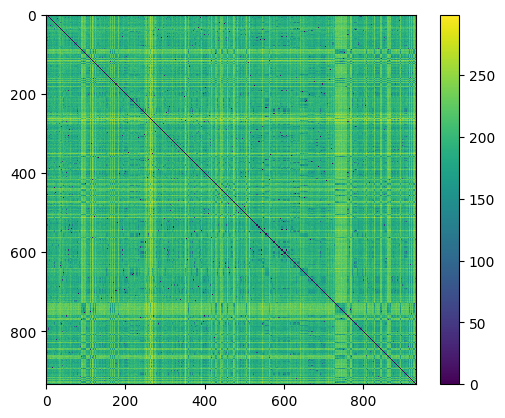

In [10]:
import matplotlib.pyplot as plt

plt.imshow(m2or_ed_matrix_np, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()


In [3]:
import numpy as np
m2or_ed_matrix_normalized_np = np.load('receptor-binding/M2OR/M2OR_2023_04_28_normalized_edit_distance_matrix.npy')
m2or_ed_matrix_normalized_np

array([[0.        , 0.63444109, 0.61933535, ..., 0.6978852 , 0.63141994,
        0.62839879],
       [0.68181818, 0.        , 0.53571429, ..., 0.72077922, 0.59415584,
        0.57792208],
       [0.65079365, 0.52380952, 0.        , ..., 0.7047619 , 0.5015873 ,
        0.56190476],
       ...,
       [0.72413793, 0.69592476, 0.69592476, ..., 0.        , 0.72100313,
        0.71473354],
       [0.6572327 , 0.5754717 , 0.49685535, ..., 0.72327044, 0.        ,
        0.58176101],
       [0.68421053, 0.58552632, 0.58223684, ..., 0.75      , 0.60855263,
        0.        ]])

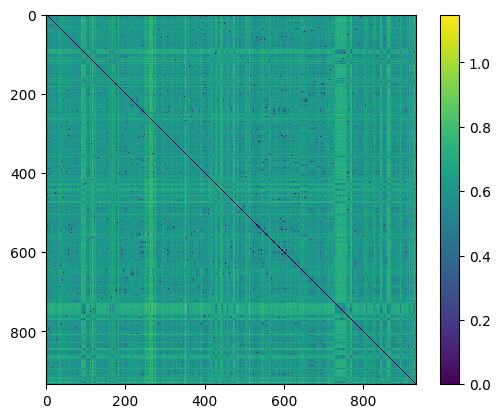

In [4]:
import matplotlib.pyplot as plt

plt.imshow(m2or_ed_matrix_normalized_np, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()


## Generate 2d matrix for Mol - OR pair by reference id, assay type, etc

In [11]:
import seq_utils
import pandas as pd

m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")
m2or

/tmp/ipykernel_974434/1742259965.py:4: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")


,Unnamed: 0.1,Unnamed: 0,id,species,Mutation,Gene ID,Uniprot ID,Sequence,Name,CID,...,Gprotein,Co_transfection,Assay System,Tag,Reference,DOI,Reference Position,Mixture,Norm_Foreign_Key,mut_sequence
0,0,0,1,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,(-)-limonene,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
1,1,1,2,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,(+)-carvone,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
2,2,2,3,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,(+)-menthol,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
3,3,3,4,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,"1,2,3-trimethylbenzene",NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
4,4,4,5,homo sapiens,NaN,OR10S1,Q8NGN2,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...,1-butanol,NaN,...,NaN,NaN,millipore guava easycyte ht flow cytometer,NaN,Rapid Deorphanization of Human Olfactory Recep...,https://doi.org/10.1021/acs.biochem.8b01208,Figure_2A,mono,NaN,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75045,75045,75045,75175,homo sapiens,NaN,OR2J2,O76002,MMIKKNASSEDFFILLGFSNWPQLEVVLFVVILIFYLMTLTGNLFI...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MMIKKNASSEDFFILLGFSNWPQLEVVLFVVILIFYLMTLTGNLFI...
75046,75046,75046,75176,homo sapiens,NaN,OR8B8,Q15620,MAAENSSFVTQFILAGLTDQPGVQIPLFFLFLGFYVVTVVGNLGLI...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MAAENSSFVTQFILAGLTDQPGVQIPLFFLFLGFYVVTVVGNLGLI...
75047,75047,75047,75177,homo sapiens,NaN,OR1E3,Q8WZA6,MMKKNQTMISEFLLLGLPIQPEQQNLFYALFLAVYLTTLLGNLLVI...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MMKKNQTMISEFLLLGLPIQPEQQNLFYALFLAVYLTTLLGNLLVI...
75048,75048,75048,75178,homo sapiens,NaN,OR51T1,Q8NGJ9,MAIFNNTTSSSSNFLLTAFPGLECAHVWISIPVCCLYTIALLGNSM...,L-Carvone d-Carvone cis-3-hexenol anis aldehyd...,NaN,...,olf,NaN,dual-glo luciferase,rho,"Ieki, Takashi, Yuki Yamanaka, and Keiichi Yosh...",https://doi.org/10.1371/journal.pone.0267356,Figure_S6,mixture,NaN,MAIFNNTTSSSSNFLLTAFPGLECAHVWISIPVCCLYTIALLGNSM...


In [23]:
m2or['Assay System'].unique()


array(['millipore guava easycyte ht flow cytometer',
       'glosensor (promega)', 'dual-glo luciferase assay system',
       'dualglo', 'flipr', 'dual-glo luciferase (promega)', 'cftr',
       'opusexpress 6000a (molecular devices)',
       'fura-2-am (molecular probes, leipzig, germany)',
       'ca2+-sensitive fluorescent dye fluo-4 acetoxymethyl ester (molecular probes, leiden, the netherlands)',
       'glosensor-22f', nan, 'dualglo (promega)', 'dual-glo luciferase',
       'pglosensor-22f-camp (promega)',
       'htrf camp dynamic kit (schering)', 'dual-luciferase', 'fura-2 am',
       'turbo tec-03', 'fura-2 am (molecular probes)',
       'dualglo system (promega)', 'glosensor™-22f',
       'flipr calcium 3 assay kit', 'pcre-seap (clontech)',
       'lipofectamine 2000 (invitrogen)',
       'dual-glo luciferase assay system (promega)'], dtype=object)

In [49]:
assay_system_lst = m2or['Assay System'].unique().tolist()

In [83]:
## Iterate row by row, obtaining value in column 'Sequence' and 'canonicalSMILES, and add to new dataframe with each row-column pair being a unique sequence and canonical SMILES pair.
## For each row-column pair, pass the "Assay System" value

# create empty dataframe with rows being unique canonical SMILES and columns being unique sequences
m2or_2d_assay_system = pd.DataFrame(index = m2or['canonicalSMILES'].unique(), columns = m2or['Sequence'].unique())

for index, row in m2or.iterrows():
    idx = assay_system_lst.index(row['Assay System'])
    m2or_2d_assay_system.loc[row['canonicalSMILES'], row['Sequence']] = idx

In [84]:
m2or_2d_assay_system

,MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLLIYSITVAGNLLILLTVGSDSHLSLPMYHFLGHLSFLDACLSTVTVPKVMAGLLTLDGKVISFEGCAVQLYCFHFLASTECFLYTVMAYDRYLAICQPLHYPVAMNRRMCAEMAGITWAIGATHAAIHTSLTFRLLYCGPCHIAYFFCDIPPVLKLACTDTTINELVMLASIGIVAAGCLILIVISYIFIVAAVLRIRTAQGRQRAFSPCTAQLTGVLLYYVPPVCIYLQPRSSEAGAGAPAVFYTIVTPMLNPFIYTLRNKEVKHALQRLLCSSFRESTAGSPPP,MTEDNYSLTTEFILIGFSDHPDLKILLFLVLSTIYLVTMVGNLGLVALIYMEPRLHTPMYIFLGNLALMDSCCSCAITPKMLENFFSVNRRISLYECMAQFYFLCLAETADCFLLAAMAYDRYVAICNPLQYHTMMSKKLCLQMTTGAYIAGNLHSMIHIGFLFRLIFCRSHVIKHFFCDVLPLYRLSCVDPYINELMILIFSGSVQTFSIIIVLISYFCILFTIFTMKSREGRSKALSTCASHFLSVSIFYGSLLYTYIRPSSINEGNEDIPVAIFYTLVIPLLNPFIYSLRNKEVINAIKRTMNKG,MPGGRNSTVITKFILVGFSDFPKLKLVLFVIFLGSYLSTVVWNLGLIILIRIDPYLHTPMYFFLSNLSFLDFCYISSTTPKMLSGFFQKSKSISFVGCTMQYFIFSSLGLSECCLLAAMAYDRYAAICNPLLYTAIMSPSLCVHMVVGAYSTGLLGSLIQLCAILQLHFCGPNIINHFFCDLPQLLVLSCSETFPLQVLKFVIAVIFGVASVIVILISYGYIIGTILNISSVEGRSKAFNTCASHLTAVTLFFGSGLFVYMRPSSNSSQGYDKMASVFYTVVIPMLNPLIYSLRNKEIKDALQRCKNKCFSQCHC,MGENQTMVTEFLLLGFLLGPRIQMLLFGLFSLFYIFTLLGNGAILGLISLDSRLHTPMYFFLSHLAVVDIAYTRNTVPQMLANLLHPAKPISFAGCMTQTFLCLSFGHSECLLLVLMSYDRYVAICHPLRYSVIMTWRVCITLAVTSWTCGSLLALAHVVLILRLPFSGPHEINHFFCEILSVLRLACADTWLNQVVIFAACVFFLVGPPSLVLVSYSHILAAILRIQSGEGRRKAFSTCSSHLCVVGLFFGSAIIMYMAPKSRHPEEQQKVFFLFYSFFNPTLNPLIYSLRNGEVKGALRRALGKESHS,MGDNITSITEFLLLGFPVGPRIQMLLFGLFSLFYVFTLLGNGTILGLISLDSRLHAPMYFFLSHLAVVDIAYACNTVPRMLVNLLHPAKPISFAGRMMQTFLFSTFAVTECLLLVVMSYDLYVAICHPLRYLAIMTWRVCITLAVTSWTTGVLLSLIHLVLLLPLPFCRPQKIYHFFCEILAVLKLACADTHINENMVLAGAISGLVGPLSTIVVSYMCILCAILQIQSREVQRKAFCTCFSHLCVIGLFYGTAIIMYVGPRYGNPKEQKKYLLLFHSLFNPMLNPLICSLRNSEVKNTLKRVLGVERAL,MEKWNHTSNDFILLGLLPPNQTGIFLLCLIILIFFLASVGNSAMIHLIHVDPRLHTPMYFLLSQLSLMDLMYISTTVPKMAYNFLSGQKGISFLGCGVQSFFFLTMACSEGLLLTSMAYDRYLAICHSLYYPIRMSKMMCVKMIGGSWTLGSINSLAHTVFALHIPYCRSRAIDHFFCDVPAMLLLACTDTWVYEYMVFVSTSLFLLFPFIGITSSCGRVLFAVYHMHSKEGRKKAFTTISTHLTVVIFYYAPFVYTYLRPRNLRSPAEDKILAVFYTILTPMLNPIIYSLRNKEVLGAMRRVFGIFSFLKE,MTGGGNITEITYFILLGFSDFPRIIKVLFTIFLVIYITSLAWNLSLIVLIRMDSHLHTPMYFFLSNLSFIDVCYISSTVPKMLSNLLQEQQTITFVGCIIQYFIFSTMGLSESCLMTAMAYDRYAAICNPLLYSSIMSPTLCVWMVLGAYMTGLTASLFQIGALLQLHFCGSNVIRHFFCDMPQLLILSCTDTFFVQVMTAILTMFFGIASALVIMISYGYIGISIMKITSAKGRSKAFNTCASHLTAVSLFYTSGIFVYLSSSSGGSSSFDRFASVFYTVVIPMLNPLIYSLRNKEIKDALKRLQKRKCC,MDNITWMASHTGWSDFILMGLFRQSKHPMANITWMANHTGWSDFILLGLFRQSKHPALLCVVIFVVFLMALSGNAVLILLIHCDAHLHTPMYFFISQLSLMDMAYISVTVPKMLLDQVMGVNKISAPECGMQMFFYVTLAGSEFFLLATMAYDRYVAICHPLRYPVLMNHRVCLFLSSGCWFLGSVDGFTFTPITMTFPFRGSREIHHFFCEVPAVLNLSCSDTSLYEIFMYLCCVLMLLIPVVIISSSYLLILLTIHGMNSAEGRKKAFATCSSHLTVVILFYGAAIYTYMLPSSYHTPEKDMMVSVFYTILTPVVNPLIYSLRNKDVMGALKKMLTVEPAFQKAME,MDGTNGSTQTHFILLGFSDRPHLERILFVVILIAYLLTLVGNTTIILVSRLDPHLHTPMYFFLAHLSFLDLSFTTSSIPQLLYNLNGCDKTISYMGCAIQLFLFLGLGGVECLLLAVMAYDRCVAICKPLHYMVIMNPRLCRGLVSVTWGCGVANSLAMSPVTLRLPRCGHHEVDHFLREMPALIRMACVSTVAIEGTVFVLAVGVVLSPLVFILLSYSYIVRAVLQIRSASGRQKAFGTCGSHLTVVSLFYGNIIYMYMQPGASSSQDQGMFLMLFYNIVTPLLNPLIYTLRNREVKGALGRLLLGKRELGKE,MSSSGSSHPFLLTGFPGLEEAHHWISVFFLFMYISILFGNGTLLLLIKEDHNLHEPMYFFLAMLAATDLGLALTTMPTVLGVLWLDHREIGSAACFSQAYFIHSLSFLESGILLAMAYDRFIAICNPLRYTSVLTNTRVVKIGLGVLMRGFVSVVPPIRPLYFFLYCHSHVLSHAFCLHQDVIKLACADTTFNRLYPAVLVVFIFVLDYLIIFISYVLILKTVLSIASREERAKALITCVSHICCVLVFYVTVIGLSLIHRFGKQVPHIVHLIMSYAYFLFPPLMNPITYSVKTKQIQNAILHLFTTHRIGT,...,MATQVHRNGSLSAVSLQGFVLVGFGGGAKTQALLFAVFLTLYVVTVLGNLTMIVVITLDARLHSPMYFFLKNLSFVDFCYSSVIAPKAMTIFLSSSKVISFAGCATQFFFFSLLVTTEGFLLAVMAYDRFMAICSPLRYPVTMCPMACARLVLGTYCGGCLNSIVQTSLTFQLPFCSSNRIDHFYCDVPPLLQLACADTTLNEFVMFGICGLIIVSTTLVVLISYGYITMTILRMRSGSGRHKVFSTCGSHMTAVSLFYGTVFVMYAQPGALTSMEQGKVVSVFYTLVIPMLNPLIYSLRNKDVKDAPRRLGQRHSLVKEDVQ,MAFLDNGNHTAVTEFILLGLTDDPFLRIVLFSIILCIYLVTVFGNLSTILLIRVSSQLHHPMYFFLSHLATVDLGISSSVTPSMLVNFLAERSTISYLGCGIQLSSAALFGTLECFLLAVMAYDRFMAICNPLLYSTKLSTRFCIQLVVGSYIGAFLNDSCYILSFAFFLFCGPNKVDHFFCDLSPMMELSCSDASVSGVVISFTAGSITMTTLIVIVISYFYILITILKMRSTEGRQKAFSTCTSHLTAVTLYYGTIIFIYVMPKSTYSRDQNKVVSLFYMVVIPMLNPLIYSLRNNEIKGALKKQFYRKTLL,MRTLYSNTSSTLSFMLTGFPEMQSLEHWLAALLLLLYVISIVGNALILFIIKEEQSLHHPMYYFLSLLSVNDLGVSFSTLPTVLASMCFHIPETAFDACLAQMFFIHFFSWTESGILLAMSFDRYVAICNPLHYSSVLTDARVAHMGMSIIIRSFCMVFPLPFLLKRLPFCKANV

In [85]:
m2or_pairwise_np = m2or_2d_assay_system.iloc[:, :].to_numpy()

In [86]:
m2or_pairwise_np

array([[0, nan, nan, ..., 20, nan, nan],
       [13, 3, nan, ..., 20, nan, 13],
       [0, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [13, nan, nan, ..., nan, nan, 13],
       [13, nan, nan, ..., nan, nan, 13]], dtype=object)

In [87]:
import matplotlib.pyplot as plt
import numpy as np

nan_value = len(assay_system_lst)

# Iterate through m2or_pairwise_np and replace pd.NA with 2
plot_m2or_pairwise_np = m2or_pairwise_np.copy()
for i in range(plot_m2or_pairwise_np.shape[0]):
    for j in range(plot_m2or_pairwise_np.shape[1]):
        if pd.isna(plot_m2or_pairwise_np[i][j]):
            plot_m2or_pairwise_np[i][j] = nan_value

In [88]:
plot_m2or_pairwise_np


array([[0, 29, 29, ..., 20, 29, 29],
       [13, 3, 29, ..., 20, 29, 13],
       [0, 29, 29, ..., 29, 29, 29],
       ...,
       [29, 29, 29, ..., 29, 29, 29],
       [13, 29, 29, ..., 29, 29, 13],
       [13, 29, 29, ..., 29, 29, 13]], dtype=object)

Text(0.5, 1.0, 'M2OR activity pairwise matrix by assay type')

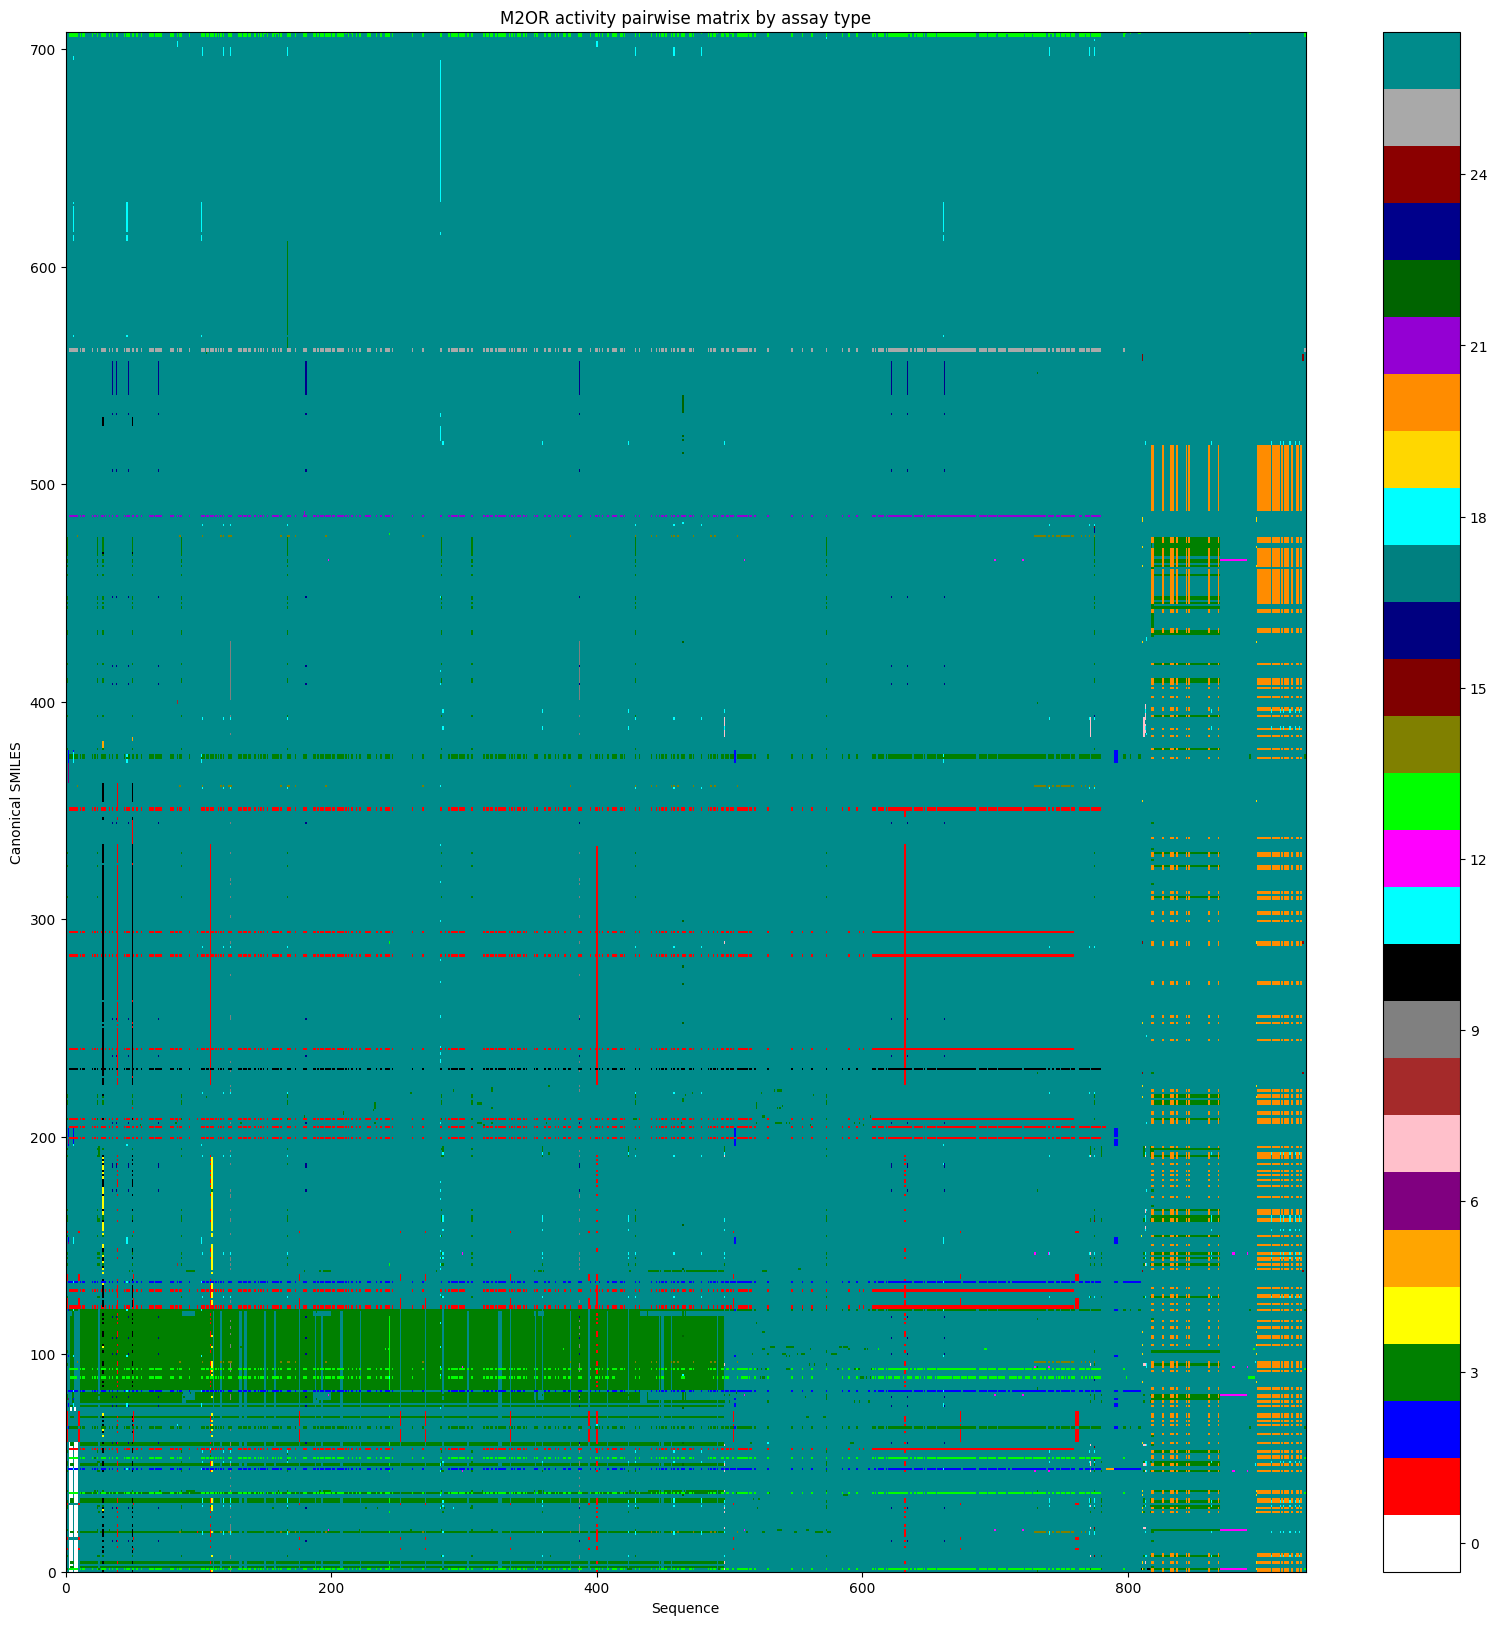

In [89]:
from matplotlib.colors import ListedColormap, NoNorm

assay_system_lst.append('None')
## Change size of plt figure
plt.rcParams['figure.figsize'] = [20, 20]

## Generate color map for each assay systyem in assay_system_lst (27 colors)
cmap = ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black', 'cyan', 'magenta', 'lime', 'olive', 'maroon', 'navy', 'teal', 'aqua', 'gold', 'darkorange', 'darkviolet', 'darkgreen', 'darkblue', 'darkred', 'darkgray', 'darkcyan'])
plt.colorbar(plt.pcolor(plot_m2or_pairwise_np.astype(int),cmap=cmap,norm=NoNorm()))
plt.pcolor(plot_m2or_pairwise_np.astype(int),cmap=cmap,norm=NoNorm())
plt.ylabel("Canonical SMILES")
plt.xlabel("Sequence")
plt.title("M2OR activity pairwise matrix by assay type")



Text(0.5, 1.0, 'M2OR activity pairwise matrix by assay type')

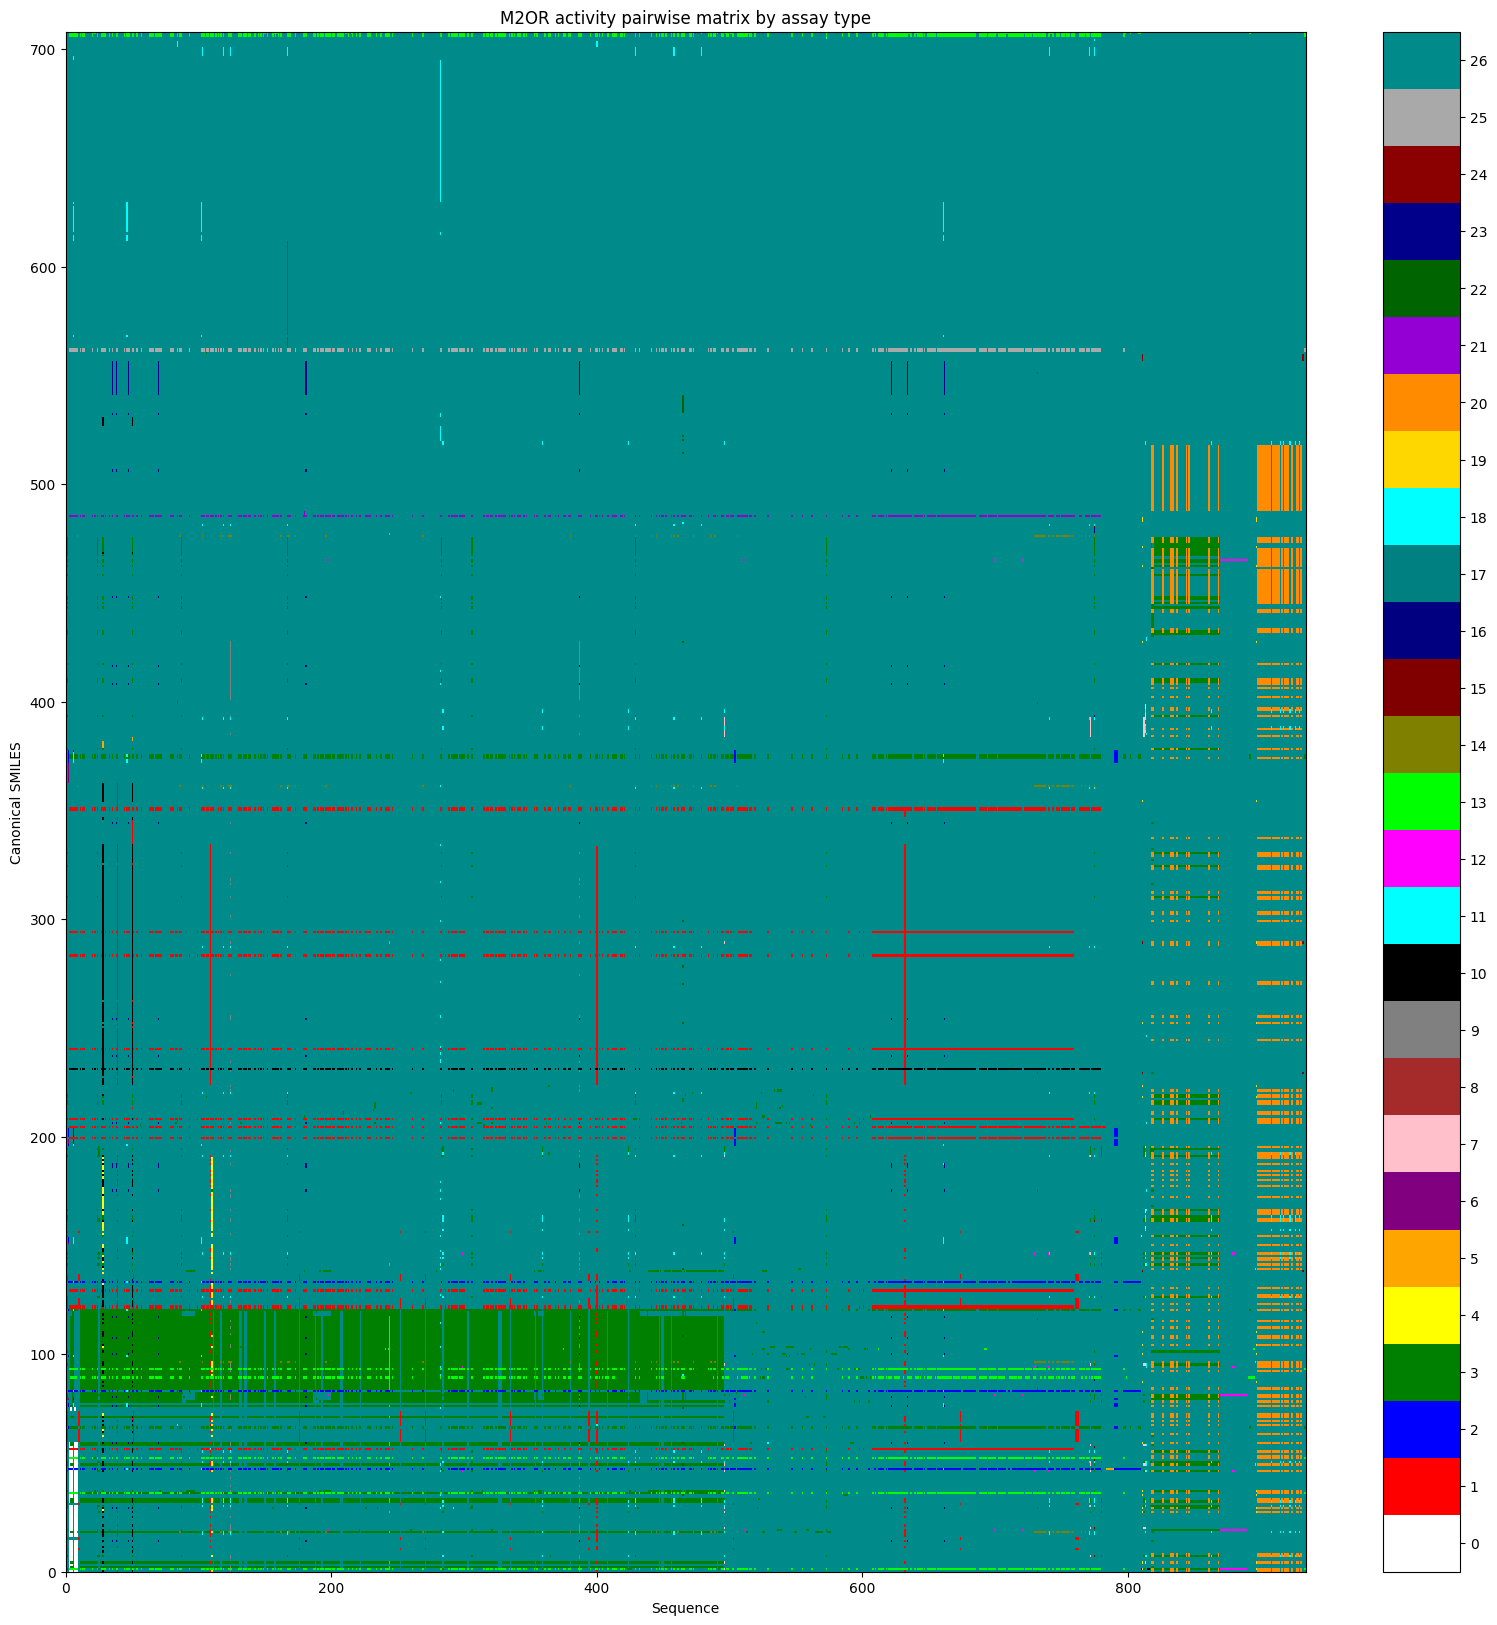

In [91]:
## Create legend by mapping every color in colormap to an assay system in assay_system_lst

cmap = ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black', 'cyan', 'magenta', 'lime', 'olive', 'maroon', 'navy', 'teal', 'aqua', 'gold', 'darkorange', 'darkviolet', 'darkgreen', 'darkblue', 'darkred', 'darkgray', 'darkcyan'])
bounds = np.arange(len(assay_system_lst))
plt.colorbar(plt.pcolor(plot_m2or_pairwise_np.astype(int),cmap=cmap,norm=NoNorm()), ticks=bounds)
plt.ylabel("Canonical SMILES")
plt.xlabel("Sequence")
plt.title("M2OR activity pairwise matrix by assay type")


In [94]:
bounds

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [95]:
len(assay_system_lst)

30

In [100]:
assay_system_lst.remove('None')
assay_system_lst

['millipore guava easycyte ht flow cytometer',
 'glosensor (promega)',
 'dual-glo luciferase assay system',
 'dualglo',
 'flipr',
 'dual-glo luciferase (promega)',
 'cftr',
 'opusexpress 6000a (molecular devices)',
 'fura-2-am (molecular probes, leipzig, germany)',
 'ca2+-sensitive fluorescent dye fluo-4 acetoxymethyl ester (molecular probes, leiden, the netherlands)',
 'glosensor-22f',
 nan,
 'dualglo (promega)',
 'dual-glo luciferase',
 'pglosensor-22f-camp (promega)',
 'htrf camp dynamic kit (schering)',
 'dual-luciferase',
 'fura-2 am',
 'turbo tec-03',
 'fura-2 am (molecular probes)',
 'dualglo system (promega)',
 'glosensor™-22f',
 'flipr calcium 3 assay kit',
 'pcre-seap (clontech)',
 'lipofectamine 2000 (invitrogen)',
 'dual-glo luciferase assay system (promega)',
 'None']

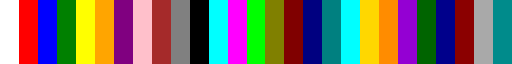

In [104]:
## Create figure mapping cmap to a value in assay_system_lst
cmap

## Collapse OR sequences to a set of known OR Uniprot IDs

In [12]:
m2or['Uniprot ID'].unique().shape

(572,)

In [1]:
import pandas as pd

m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")

# Get num of null Uniprot IDs
m2or['Uniprot ID'].isnull().sum()

/tmp/ipykernel_2529869/69422488.py:3: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  m2or = pd.read_csv("receptor-binding/M2OR/M2OR_2023_04_28_full_seq_mut_canonSMILES.csv")


33714

In [2]:
## Get list of unique 'Sequences'
m2or_nan = m2or[m2or['Uniprot ID'].isna()]
unique_sequences = m2or_nan['Sequence'].unique().tolist()
#unique_sequences = m2or['Sequence'].unique().tolist()
## write unique_sequences list to fasta file, where each entry is a unique sequence
with open('receptor-binding/M2OR/M2OR_2023_04_28_NAN_unique_sequences.fasta', 'w') as f:
    for seq in unique_sequences:
        f.write('>' + seq + '\n' + seq + '\n')
     
f.close()

### Baseline dataset debugging

In [12]:
import pandas as pd 

data_path = 'data/datasets/M2OR_OR_odorant_pairwise_no_mixtures_dgl_two_class.csv'

df = pd.read_csv(data_path)

df.columns

Index(['smiles',
       'Q8NGN2: MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLLIYSITVAGNLLILLTVGSDSHLSLPMYHFLGHLSFLDACLSTVTVPKVMAGLLTLDGKVISFEGCAVQLYCFHFLASTECFLYTVMAYDRYLAICQPLHYPVAMNRRMCAEMAGITWAIGATHAAIHTSLTFRLLYCGPCHIAYFFCDIPPVLKLACTDTTINELVMLASIGIVAAGCLILIVISYIFIVAAVLRIRTAQGRQRAFSPCTAQLTGVLLYYVPPVCIYLQPRSSEAGAGAPAVFYTIVTPMLNPFIYTLRNKEVKHALQRLLCSSFRESTAGSPPP',
       'A0A140T8K4: MTEDNYSLTTEFILIGFSDHPDLKILLFLVLSTIYLVTMVGNLGLVALIYMEPRLHTPMYIFLGNLALMDSCCSCAITPKMLENFFSVNRRISLYECMAQFYFLCLAETADCFLLAAMAYDRYVAICNPLQYHTMMSKKLCLQMTTGAYIAGNLHSMIHIGFLFRLIFCRSHVIKHFFCDVLPLYRLSCVDPYINELMILIFSGSVQTFSIIIVLISYFCILFTIFTMKSREGRSKALSTCASHFLSVSIFYGSLLYTYIRPSSINEGNEDIPVAIFYTLVIPLLNPFIYSLRNKEVINAIKRTMNKG',
       'Q8VFV4: MPGGRNSTVITKFILVGFSDFPKLKLVLFVIFLGSYLSTVVWNLGLIILIRIDPYLHTPMYFFLSNLSFLDFCYISSTTPKMLSGFFQKSKSISFVGCTMQYFIFSSLGLSECCLLAAMAYDRYAAICNPLLYTAIMSPSLCVHMVVGAYSTGLLGSLIQLCAILQLHFCGPNIINHFFCDLPQLLVLSCSETFPLQVLKFVIAVIFGVASVIVILISYGYIIGTILNISSVEGRSKAFNTCASHLTAVTLFFGSGLFVYMRPSSNSSQGYDKMASVFYTVVIPML

In [13]:
## After the first column, DROP any columns with only one unique value
df = df.loc[:, df.apply(pd.Series.nunique) != 1]

In [14]:
df

,smiles,Q8NGN2: MTSRSVCEKMTMTTENPNQTVVSHFFLEGLRYTAKHSSLFFLLFLLIYSITVAGNLLILLTVGSDSHLSLPMYHFLGHLSFLDACLSTVTVPKVMAGLLTLDGKVISFEGCAVQLYCFHFLASTECFLYTVMAYDRYLAICQPLHYPVAMNRRMCAEMAGITWAIGATHAAIHTSLTFRLLYCGPCHIAYFFCDIPPVLKLACTDTTINELVMLASIGIVAAGCLILIVISYIFIVAAVLRIRTAQGRQRAFSPCTAQLTGVLLYYVPPVCIYLQPRSSEAGAGAPAVFYTIVTPMLNPFIYTLRNKEVKHALQRLLCSSFRESTAGSPPP,A0A140T8K4: MTEDNYSLTTEFILIGFSDHPDLKILLFLVLSTIYLVTMVGNLGLVALIYMEPRLHTPMYIFLGNLALMDSCCSCAITPKMLENFFSVNRRISLYECMAQFYFLCLAETADCFLLAAMAYDRYVAICNPLQYHTMMSKKLCLQMTTGAYIAGNLHSMIHIGFLFRLIFCRSHVIKHFFCDVLPLYRLSCVDPYINELMILIFSGSVQTFSIIIVLISYFCILFTIFTMKSREGRSKALSTCASHFLSVSIFYGSLLYTYIRPSSINEGNEDIPVAIFYTLVIPLLNPFIYSLRNKEVINAIKRTMNKG,Q8VFV4: MPGGRNSTVITKFILVGFSDFPKLKLVLFVIFLGSYLSTVVWNLGLIILIRIDPYLHTPMYFFLSNLSFLDFCYISSTTPKMLSGFFQKSKSISFVGCTMQYFIFSSLGLSECCLLAAMAYDRYAAICNPLLYTAIMSPSLCVHMVVGAYSTGLLGSLIQLCAILQLHFCGPNIINHFFCDLPQLLVLSCSETFPLQVLKFVIAVIFGVASVIVILISYGYIIGTILNISSVEGRSKAFNTCASHLTAVTLFFGSGLFVYMRPSSNSSQGYDKMASVFYTVVIPMLNPLIYSLRNKEIKDALQRCKNKCFSQCHC,Q8NGT9: MGENQTMVTEFLLLGFLLGPRIQMLLFGLFSLFYIFTLLGNGAILGLISLDSRLHTPMYFFLSHLAVVDIAYTRNTVPQMLANLLHPAKPISFAGCMTQTFLCLSFGHSECLLLVLMSYDRYVAICHPLRYSVIMTWRVCITLAVTSWTCGSLLALAHVVLILRLPFSGPHEINHFFCEILSVLRLACADTWLNQVVIFAACVFFLVGPPSLVLVSYSHILAAILRIQSGEGRRKAFSTCSSHLCVVGLFFGSAIIMYMAPKSRHPEEQQKVFFLFYSFFNPTLNPLIYSLRNGEVKGALRRALGKESHS,Q96R45: MGDNITSITEFLLLGFPVGPRIQMLLFGLFSLFYVFTLLGNGTILGLISLDSRLHAPMYFFLSHLAVVDIAYACNTVPRMLVNLLHPAKPISFAGRMMQTFLFSTFAVTECLLLVVMSYDLYVAICHPLRYLAIMTWRVCITLAVTSWTTGVLLSLIHLVLLLPLPFCRPQKIYHFFCEILAVLKLACADTHINENMVLAGAISGLVGPLSTIVVSYMCILCAILQIQSREVQRKAFCTCFSHLCVIGLFYGTAIIMYVGPRYGNPKEQKKYLLLFHSLFNPMLNPLICSLRNSEVKNTLKRVLGVERAL,Q8N349: MEKWNHTSNDFILLGLLPPNQTGIFLLCLIILIFFLASVGNSAMIHLIHVDPRLHTPMYFLLSQLSLMDLMYISTTVPKMAYNFLSGQKGISFLGCGVQSFFFLTMACSEGLLLTSMAYDRYLAICHSLYYPIRMSKMMCVKMIGGSWTLGSINSLAHTVFALHIPYCRSRAIDHFFCDVPAMLLLACTDTWVYEYMVFVSTSLFLLFPFIGITSSCGRVLFAVYHMHSKEGRKKAFTTISTHLTVVIFYYAPFVYTYLRPRNLRSPAEDKILAVFYTILTPMLNPIIYSLRNKEVLGAMRRVFGIFSFLKE,Q8NGI8: MTGGGNITEITYFILLGFSDFPRIIKVLFTIFLVIYITSLAWNLSLIVLIRMDSHLHTPMYFFLSNLSFIDVCYISSTVPKMLSNLLQEQQTITFVGCIIQYFIFSTMGLSESCLMTAMAYDRYAAICNPLLYSSIMSPTLCVWMVLGAYMTGLTASLFQIGALLQLHFCGSNVIRHFFCDMPQLLILSCTDTFFVQVMTAILTMFFGIASALVIMISYGYIGISIMKITSAKGRSKAFNTCASHLTAVSLFYTSGIFVYLSSSSGGSSSFDRFASVFYTVVIPMLNPLIYSLRNKEIKDALKRLQKRKCC,Q8NH00: MDNITWMASHTGWSDFILMGLFRQSKHPMANITWMANHTGWSDFILLGLFRQSKHPALLCVVIFVVFLMALSGNAVLILLIHCDAHLHTPMYFFISQLSLMDMAYISVTVPKMLLDQVMGVNKISAPECGMQMFFYVTLAGSEFFLLATMAYDRYVAICHPLRYPVLMNHRVCLFLSSGCWFLGSVDGFTFTPITMTFPFRGSREIHHFFCEVPAVLNLSCSDTSLYEIFMYLCCVLMLLIPVVIISSSYLLILLTIHGMNSAEGRKKAFATCSSHLTVVILFYGAAIYTYMLPSSYHTPEKDMMVSVFYTILTPVVNPLIYSLRNKDVMGALKKMLTVEPAFQKAME,Q7Z3T1: MDGTNGSTQTHFILLGFSDRPHLERILFVVILIAYLLTLVGNTTIILVSRLDPHLHTPMYFFLAHLSFLDLSFTTSSIPQLLYNLNGCDKTISYMGCAIQLFLFLGLGGVECLLLAVMAYDRCVAICKPLHYMVIMNPRLCRGLVSVTWGCGVANSLAMSPVTLRLPRCGHHEVDHFLREMPALIRMACVSTVAIEGTVFVLAVGVVLSPLVFILLSYSYIVRAVLQIRSASGRQKAFGTCGSHLTVVSLFYGNIIYMYMQPGASSSQDQGMFLMLFYNIVTPLLNPLIYTLRNREVKGALGRLLLGKRELGKE,...,Q3KPB0: MEITNSSWFQPPTLLLTGIPGLEDVQIWFCIPLCVMYLIALLGNCTILFVIKTTSSLHEPQYIFLSMLAATDVGLSVSTLPTVLNVFLLNHRDIEFHSCLTQMFFIHTFSSMESAILLAMAFDRFVAIRNPLHYTAVLTPTRIIKIGLAAVVRGVMLMIPLPILLKRLPFCKGVILSHCYCYHPDIMKLACGPVRVNIIYGLSLVLCSFGVDSVFIVISYILILKTVLGIASGDGKLKALNTCVSHIFTVFIFYVPLIVLALIHRFGTFASPLLHVTMANLFLFLTPVLNPLVYSLKTKQIRSAVCKIFKVWGNLLK,A2ATE5: MLNFTDVTEFILLGLTSRKELQVLFFVIFLMVYIVTMVGNIGMMILIKISPQLSSPMYFFLSHLSFVDVWFSSNVTPKMLENLLSKTKTISYAGCLVQCFFFIALVHVEIFILAVMAFDRYMAIGKPLLYGSKMSRVVCIRLISFPYIYGFLTSLAATLWTYGLYFCGKTEINHFYCADPPLIKMACAGTFVKEYTMIILAGINFTYSLSVVIISYLFILIAILRMRSAEGRRKAFSTCGSHLTAVVIFYGTLIFMYLRRPTEESVEQGKMVAVFYTTVIPMLNPMIYSLRNKDVKEAMDKVISRKGLTK,Q3U0P3: MSDVNTTSNWPTFSFIGIPGLEAAHMWISIPFCLLYLVALGGNFLLLLLVRAEQNLHEPQFYFLAMLGLTDLGLSLSTMPSVLAIFWFDVHDVGLDACLTQMFFIHTLSSVESGVLVAMAFDRLVAICAPLTYTRILNHQTVLCLSGAALIRGATLLAPLPFFLRTFPFCGANILSHSYCYYPDMLNLACGDVTFSSVYGLVCVLCTFAVDVIFILVSYMKILGTVMKLGIQDRNWKSLQTCVCHLCTVLVFYLPLISLAVLHRYTQETSPILYTTMSNAYLLMTPLLNPLVYSLKSRQIQAALRKRFVVQRVVAGE,Q7TRN9: MEAQSNTSSILAPDFLLICFPNYQTWQHWLSLPLSLLFLLAMGANATLLITIRMEASLHEPMYYL

### paired t-tests for percepts versus no percepts

In [10]:
from scipy import stats

# run model on 5 random seeds for reproducibility (seeds 7, 32, 33, 42, 63), obtain ROC-AUC values
horde = [0.8738947345051566, 0.875890339231197, 0.8718010869424179, 0.881489918792639, 0.8767328248714876]
baseline = [0.8692354457812478, 0.869841302157107, 0.8639067314714455, 0.8699695098282144, 0.8650905149115553]

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(horde, baseline)

print(f"t-statistic: {t_statistic}, p-value: {p_value}")


t-statistic: 5.905475654950839, p-value: 0.004114894354808054


In [12]:
# report mean and std of both
import numpy as np
horde_mean = np.mean(horde)
horde_std = np.std(horde)

baseline_mean = np.mean(baseline)
baseline_std = np.std(baseline)

print(f"Horde mean: {horde_mean}, Horde std: {horde_std}")
print(f"Baseline mean: {baseline_mean}, Baseline std: {baseline_std}")

Horde mean: 0.8759617808685796, Horde std: 0.003247890893645778
Baseline mean: 0.867608700829914, Baseline std: 0.002578761888961052
